# IRI Prediction 

**The International Roughness Index (IRI) in transportation engineering measures road roughness.Predicted IRI from LTPP database which Gathering extensive data on pavement materials, construction methods, traffic loads, climate conditions, and other relevant factors from a wide range of pavement test sections across the country.**

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib 

In [9]:
Table_Reference = pd.read_excel('Bucket_111811.xlsx', sheet_name='Table Reference')
Table_Reference

,TABLE_NAME,TABLE_ALIAS,TABLE_DESCRIPTION,CLASS_NAME
0,EXPERIMENT_SECTION,Experiment Section,Contains the time history of changes in constr...,Experiment Type and Improvement (M&R) History
1,MON_DIS_AC_REV,AC Distress Survey Ratings,Distress survey ratings from manual field insp...,Manual Distress
2,MON_HSS_PROFILE_SECTION,Longitudinal Profile Section Summary,High Speed Survey section level profile comput...,Section Level IRI
3,MON_RUT_DEPTH_POINT,Rut Depth Point,Field measured rut depths at each measurement ...,1.2m Straightedge Rut Measurements (Limited Da...
4,RHB_LAYER,Rehabilitation Layer Table,"Rehabilitated layer description, rehab layer t...",Layer Thickness and Description (Project Recor...
5,SECTION_CONST_LAYER_EXP,Section Construction Layering,Table describing the originally built structur...,Layer Thickness and Description (Project Recor...
6,SHRP_INFO,LTPP Traffic Site Information,Data describing the traffic data relations and...,Site Characteristics
7,TRF_HIST_EST_ESAL,Historical ESAL Estimates,"Estimated annual ESALs, truck volumes, and met...",Estimated Equivalent Axle Loads (ESALs)
8,TRF_MON_EST_ESAL,Monitored Traffic ESAL Estimations,"Estimated annual ESALs, truck volumes, and met...",Estimated Equivalent Axle Loads (ESALs)
9,TST_L05B,Material Characterization and Thickness Data,Table containing layer descriptions for all co...,Representative Pavement Structure


In [10]:
#LTPP Traffic Site Information
#Data describing the traffic data relations and site conditions for a given SPS project or GPS Site.
SHRP_INFO1 = pd.read_excel('Bucket_111811.xlsx', sheet_name='SHRP_INFO')
SHRP_INFO1

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,START_DATE,RECORD_STATUS,END_DATE,VOLUME_SITE,CLASS_SITE,WIM_SITE,ID3,...,ERR_1AM1PM,ERR_8ZERO,ERR_4STATIC,LTPP_LN_ONLY,USEFILENAME,UPDATE_LNDIR,LOAD_LN,LOAD_DIR_EXP,LOAD_DIR,LOAD_HOURS
0,1,Alabama,4073,1995-01-01,E,2050-12-31,NaN,4073,4073,905,...,Y,Y,Y,N,Y,N,1,East,3,N
1,1,Alabama,1019,1994-01-01,E,2050-12-31,NaN,1019,1019,915,...,Y,Y,Y,N,Y,N,1,South,5,N
2,1,Alabama,4073,1990-01-01,E,1994-12-31,NaN,4073,4073,905,...,Y,Y,Y,N,Y,N,1,East,3,N
3,1,Alabama,1019,1990-01-01,E,1993-12-31,NaN,1019,1019,915,...,Y,Y,Y,N,Y,N,1,South,5,N
4,1,Alabama,1011,1990-01-01,E,1993-12-31,NaN,1011,1011,903,...,Y,Y,Y,N,Y,N,1,West,7,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,84,New Brunswick,1802,1990-01-01,E,2050-12-31,NaN,1802,1802,000,...,Y,Y,Y,N,Y,N,1,North,1,N
291,87,Ontario,1680,1990-01-01,E,2050-12-31,NaN,1680,1680,002,...,Y,Y,Y,Y,Y,N,1,South,5,N
292,88,Prince Edward Island,1646,1990-01-01,E,2050-12-31,NaN,1646,1646,102,...,Y,Y,Y,Y,Y,N,1,West,7,N
293,88,Prince Edward Island,1647,1990-01-01,E,2050-12-31,NaN,1647,1647,210,...,Y,Y,Y,Y,Y,N,1,West,7,N


In [11]:
SHRP_INFO  = SHRP_INFO1.dropna(axis =1)
SHRP_INFO.query('SHRP_ID==1802')

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,START_DATE,RECORD_STATUS,END_DATE,CLASS_SITE,WIM_SITE,LTPP_DIR,LTPP_DIR_EXP,...,ERR_1AM1PM,ERR_8ZERO,ERR_4STATIC,LTPP_LN_ONLY,USEFILENAME,UPDATE_LNDIR,LOAD_LN,LOAD_DIR_EXP,LOAD_DIR,LOAD_HOURS
130,28,Mississippi,1802,1998-01-01,E,2050-12-31,1802,1802,3,East,...,Y,Y,Y,N,Y,N,1,East,3,N
146,28,Mississippi,1802,1996-01-01,E,1997-12-31,1802,1802,3,East,...,Y,Y,Y,N,Y,N,1,East,3,N
149,28,Mississippi,1802,1990-01-01,E,1993-12-31,1802,1802,3,East,...,Y,Y,Y,N,Y,N,1,East,3,N
161,28,Mississippi,1802,1994-01-01,E,1995-12-31,1802,1802,3,East,...,Y,Y,Y,N,Y,N,1,East,3,N
290,84,New Brunswick,1802,1990-01-01,E,2050-12-31,1802,1802,1,North,...,Y,Y,Y,N,Y,N,1,North,1,N


In [12]:
# Convert the 'Starting Date' and 'Ending Date' columns to datetime objects with 'Year-Month-Day' format
SHRP_INFO['START_DATE'] = pd.to_datetime(SHRP_INFO['START_DATE'])
SHRP_INFO['END_DATE'] = pd.to_datetime(SHRP_INFO['END_DATE'])

# Sort the DataFrame by 'Starting Date' and 'Ending Date'
SHRP_INFO = SHRP_INFO.sort_values(by=['START_DATE', 'END_DATE'])

# Group by the first four columns and find the rows with the minimum starting date and maximum ending date for each group
agg_dict = {
    'START_DATE': 'first',
    'END_DATE': 'last'
}
SHRP_INFO_F = SHRP_INFO.groupby(['STATE_CODE', 'SHRP_ID'], as_index=False).agg(agg_dict)
SHRP_INFO_F['LIFE_SPAN(YEARS)'] = (SHRP_INFO_F['END_DATE'] - SHRP_INFO_F['START_DATE']).dt.days/365 
#SHRP_INFO_F['START_YEAR'] = SHRP_INFO_F['START_DATE'].dt.year
SHRP_INFO_F.drop(['END_DATE'] ,axis=1 ,  inplace =True)
SHRP_INFO_F

C:\Users\Sanwariya\AppData\Local\Temp\ipykernel_15028\1960904894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SHRP_INFO['START_DATE'] = pd.to_datetime(SHRP_INFO['START_DATE'])
C:\Users\Sanwariya\AppData\Local\Temp\ipykernel_15028\1960904894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SHRP_INFO['END_DATE'] = pd.to_datetime(SHRP_INFO['END_DATE'])


,STATE_CODE,SHRP_ID,START_DATE,LIFE_SPAN(YEARS)
0,1,1011,1990-01-01,61.038356
1,1,1019,1990-01-01,61.038356
2,1,1021,1990-01-01,61.038356
3,1,4073,1990-01-01,61.038356
4,4,1062,1990-01-01,61.038356
...,...,...,...,...
136,84,1802,1990-01-01,61.038356
137,87,1680,1990-01-01,61.038356
138,88,1646,1990-01-01,61.038356
139,88,1647,1990-01-01,61.038356


In [13]:
#Material Characterization and Thickness Data	Table containing layer descriptions for all constructions.
TST_L05B2 = pd.read_excel('Bucket_111811.xlsx', sheet_name='TST_L05B')
TST_L05B2N = TST_L05B2.dropna(axis =1)
TST_L05B2N.head(5)#.query('SHRP_ID==1802')

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,CONSTRUCTION_NO,LAYER_NO,DESCRIPTION,DESCRIPTION_EXP,LAYER_TYPE,LAYER_TYPE_EXP,MATL_CODE_EXP,MATL_CODE,RECORD_STATUS
0,1,Alabama,1019,2,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
1,1,Alabama,1011,1,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
2,1,Alabama,1011,2,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
3,1,Alabama,1019,1,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
4,1,Alabama,1021,1,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E


In [18]:
TST_L05B2N1 = TST_L05B2N.drop('CONSTRUCTION_NO', axis=1)
TST_L05B2N2 = TST_L05B2N1.drop_duplicates()
TST_L05B2N2.query('SHRP_ID==1802')


,STATE_CODE,STATE_CODE_EXP,SHRP_ID,LAYER_NO,DESCRIPTION,DESCRIPTION_EXP,LAYER_TYPE,LAYER_TYPE_EXP,MATL_CODE_EXP,MATL_CODE,RECORD_STATUS
270,28,Mississippi,1802,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
299,28,Mississippi,1802,4,4,AC Layer Below Surface (Binder Course),AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
906,84,New Brunswick,1802,5,3,Original Surface Layer,AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
908,84,New Brunswick,1802,4,4,AC Layer Below Surface (Binder Course),AC,Asphalt concrete layer,"Hot Mixed, Hot Laid AC, Dense Graded",1,E
1572,28,Mississippi,1802,1,7,Subgrade,SS,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand,202,E
1603,84,New Brunswick,1802,1,7,Subgrade,SS,Subgrade (untreated),Coarse-Grained Soils: Poorly Graded Sand with ...,205,E
1851,84,New Brunswick,1802,2,6,Subbase Layer,GS,Unbound (granular) subbase,Gravel (Uncrushed),302,E
2085,28,Mississippi,1802,2,6,Subbase Layer,GS,Unbound (granular) subbase,"Other (Specify, if Possible)",310,E
2111,28,Mississippi,1802,3,5,Base Layer,TB,Bound (treated) base,HMAC,319,E
2288,84,New Brunswick,1802,3,5,Base Layer,TB,Bound (treated) base,Asphalt Treated Mixture,321,E


In [19]:
# Group by  and get the maximum layer number for each group
agg_dict = {
    'LAYER_NO': 'max',
    'DESCRIPTION': lambda x: set(x)
}
grouped_df_T = TST_L05B2N2.groupby(['STATE_CODE', 'SHRP_ID'], as_index=False).agg(agg_dict)

#DESCRIPTION-layer description Code indicating general type of layer.
# Create new columns for each unique layer description Code and represent their presence using 1 and absence using 0
for num in grouped_df_T['DESCRIPTION']:
    for material_num in num:
        col_name = f'DESCRIPTION_{material_num}'
        grouped_df_T[col_name] = grouped_df_T['DESCRIPTION'].apply(lambda x:1 if material_num in x else 0)

# Drop the original 'DESCRIPTION' column as it's no longer needed
grouped_df_T.drop('DESCRIPTION', axis=1, inplace=True)
TST_L05B2_F = grouped_df_T
TST_L05B2_F.rename(columns={'LAYER_NO': 'Max_LAYER_NO'}, inplace=True)
TST_L05B2_F

,STATE_CODE,SHRP_ID,Max_LAYER_NO,DESCRIPTION_3,DESCRIPTION_5,DESCRIPTION_6,DESCRIPTION_7,DESCRIPTION_1,DESCRIPTION_4,DESCRIPTION_9,DESCRIPTION_10,DESCRIPTION_2,DESCRIPTION_8
0,1,1011,5,1,1,1,1,0,0,0,0,0,0
1,1,1019,6,1,1,1,1,1,1,0,0,0,0
2,1,1021,5,1,1,1,1,0,1,0,0,0,0
3,1,4073,5,1,1,1,1,0,0,0,0,0,0
4,4,1062,9,1,1,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84,1802,5,1,1,1,1,0,1,0,0,0,0
137,87,1680,8,1,1,1,1,1,0,0,0,0,0
138,88,1646,4,1,1,0,1,0,1,0,0,0,0
139,88,1647,5,1,1,1,1,0,0,0,0,0,0


In [20]:
#Longitudinal Profile Section Summary	
#High Speed Survey section level profile computed parameters and statistics based on 150 mm interval data.

MON_HSS_PROFILE_SECTION3 = pd.read_excel('Bucket_111811.xlsx', sheet_name='MON_HSS_PROFILE_SECTION')
print(MON_HSS_PROFILE_SECTION3.isna().sum())
MON_HSS_PROFILE_SECTION3N = MON_HSS_PROFILE_SECTION3.dropna(axis=1)
MON_HSS_PROFILE_SECTION3N

#MON_HSS_PROFILE_SECTION3N['VISIT_DATE'] = pd.to_datetime(MON_HSS_PROFILE_SECTION3N['VISIT_DATE'])

# Extract the year from the date column
MON_HSS_PROFILE_SECTION3N['YEAR_MON_EST'] =MON_HSS_PROFILE_SECTION3N['VISIT_DATE'].dt.year
#MON_HSS_PROFILE_SECTION3N['VISIT_YEAR'] =MON_HSS_PROFILE_SECTION3N['VISIT_DATE'].dt.year
#MON_HSS_PROFILE_SECTION3N['VISIT_MONTH'] =MON_HSS_PROFILE_SECTION3N['VISIT_DATE'].dt.month
MON_HSS_PROFILE_SECTION3N.drop(['VISIT_NO','STATE_CODE_EXP','IRI_LEFT_WHEEL_PATH','IRI_RIGHT_WHEEL_PATH'],axis=1, inplace=True)


MON_HSS_PROFILE_SECTION3N

CONSTRUCTION_NO            0
VISIT_DATE                 0
VISIT_NO                   0
STATE_CODE                 0
STATE_CODE_EXP             0
SHRP_ID                    0
RUN_NUMBER                 0
IRI_LEFT_WHEEL_PATH        0
IRI_RIGHT_WHEEL_PATH       0
IRI_CENTER_LANE         7380
MRI                        0
dtype: int64


,CONSTRUCTION_NO,VISIT_DATE,STATE_CODE,SHRP_ID,RUN_NUMBER,MRI,YEAR_MON_EST
0,1,1992-02-11,1,1011,8,0.839,1992
1,1,1999-06-17,1,1021,4,1.135,1999
2,1,1992-02-11,1,1011,7,0.829,1992
3,2,2002-06-06,1,1011,7,1.254,2002
4,2,2003-04-07,1,4073,6,1.079,2003
...,...,...,...,...,...,...,...
7965,2,2001-09-19,89,2011,8,1.782,2001
7966,2,2001-09-19,89,2011,6,1.760,2001
7967,2,2001-09-19,89,2011,5,1.729,2001
7968,2,2001-09-19,89,2011,2,1.788,2001


In [21]:
MON_RUT_DEPTH_POINT5 = pd.read_excel('Bucket_111811.xlsx', sheet_name='MON_RUT_DEPTH_POINT')
MON_RUT_DEPTH_POINT5F = MON_RUT_DEPTH_POINT5.groupby(['STATE_CODE', 'SHRP_ID', 'CONSTRUCTION_NO', 'SURVEY_DATE'], as_index=False)['LEFT_RUT_DEPTH'].mean()
MON_RUT_DEPTH_POINT5F.head(5)

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,SURVEY_DATE,LEFT_RUT_DEPTH
0,1,1011,1,1993-03-30,2.181818
1,1,1019,1,1993-03-29,11.000000
2,1,1019,1,1995-07-22,12.454545
3,1,1021,1,1993-04-02,5.454545
4,1,4073,1,1993-03-30,2.909091


In [22]:
#Monitored Traffic ESAL Estimations	
#Estimated annual ESALs, truck volumes, and methods of estimation from Traffic Data Sheet 10 for the period after initiation of LTPP monitoring(1990).
TRF_MON_EST_ESAL6 = pd.read_excel('Bucket_111811.xlsx', sheet_name='TRF_MON_EST_ESAL')
TRF_MON_EST_ESAL6.drop('STATE_CODE_EXP',axis = 1 )
# Sort the DataFrame 
TRF_MON_EST_ESAL6.sort_values(['STATE_CODE', 'SHRP_ID','YEAR_MON_EST'], inplace=True)

# Calculate the cumulative sum of 'Traffic' for each group of similar rows
TRF_MON_EST_ESAL6['Cumulative_Traffic'] = TRF_MON_EST_ESAL6.groupby(['STATE_CODE', 'SHRP_ID'])['ANL_KESAL_LTPP_LN_YR'].cumsum()
TRF_MON_EST_ESAL6.drop('STATE_CODE_EXP', axis = 1 ,  inplace =True)
TRF_MON_EST_ESAL6#.isna().sum()

,STATE_CODE,SHRP_ID,YEAR_MON_EST,ANL_KESAL_LTPP_LN_YR,Cumulative_Traffic
0,1,1011,1990,42,42
1,1,1011,1991,43,85
2,1,1011,1992,44,129
39,1,1011,1993,44,173
40,1,1011,1994,45,218
...,...,...,...,...,...
1901,89,2011,2003,40,531
1902,89,2011,2004,40,571
1903,89,2011,2005,41,612
1904,89,2011,2006,41,653


***MARGE OF IRI profile and Traffic data***

In [23]:
# Pivot the DataFrame to set "Year" as columns and "Traffic in Year" as data
pivoted_df = TRF_MON_EST_ESAL6.pivot(index=['STATE_CODE', 'SHRP_ID'], columns='YEAR_MON_EST', values='ANL_KESAL_LTPP_LN_YR').reset_index()

# Rename the columns to add a prefix for the "Year" columns
pivoted_df.columns = [f'Traffic_{year}' if isinstance(year, int) else year for year in pivoted_df.columns]

# Fill NaN values with zeros
pivoted_df.fillna(0, inplace=True)
TRF_MON_EST_ESAL6F = pivoted_df
TRF_MON_EST_ESAL6F


,STATE_CODE,SHRP_ID,Traffic_1990,Traffic_1991,Traffic_1992,Traffic_1993,Traffic_1994,Traffic_1995,Traffic_1996,Traffic_1997,...,Traffic_2010,Traffic_2011,Traffic_2012,Traffic_2013,Traffic_2014,Traffic_2015,Traffic_2016,Traffic_2017,Traffic_2018,Traffic_2019
0,1,1011,42.0,43.0,44.0,44.0,45.0,47.0,50.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1019,93.0,96.0,99.0,102.0,105.0,108.0,111.0,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1021,127.0,130.0,134.0,138.0,142.0,147.0,151.0,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4073,57.0,59.0,60.0,0.0,64.0,66.0,68.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1062,1527.0,950.0,1000.0,0.0,1000.0,1000.0,1000.0,1100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84,1802,269.0,280.0,299.0,307.0,347.0,328.0,304.0,324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,87,1680,225.0,228.0,232.0,237.0,336.0,0.0,383.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,88,1646,76.0,0.0,65.0,73.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,88,1647,41.0,0.0,40.0,48.0,42.0,0.0,0.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Historical ESAL Estimates	
#Estimated annual ESALs, truck volumes, and methods of estimation from Traffic Data Sheets 2 and 3 for the period from 1965 up to the year before LTPP monitoring began (1989).
TRF_HIST_EST_ESAL7 =  pd.read_excel('Bucket_111811.xlsx', sheet_name='TRF_HIST_EST_ESAL')
TRF_HIST_EST_ESAL7

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,YEAR_HIST_EST
0,1,Alabama,4073,1988
1,1,Alabama,4073,1989
2,1,Alabama,1021,1985
3,1,Alabama,1021,1986
4,1,Alabama,1021,1987
...,...,...,...,...
1347,89,Quebec,2011,1985
1348,89,Quebec,2011,1986
1349,89,Quebec,2011,1988
1350,89,Quebec,2011,1987


In [25]:
RHB_LAYER8 = pd.read_excel('Bucket_111811.xlsx', sheet_name='RHB_LAYER')
SECTION_CONST_LAYER_EXP9= pd.read_excel('Bucket_111811.xlsx', sheet_name='SECTION_CONST_LAYER_EXP')
RHB_LAYER8.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,DATE_COMPLETE,CONSTRUCTION_NO,LAYER_NO,DESCRIPTION,DESCRIPTION_EXP,MATERIAL_TYPE,MATERIAL_TYPE_EXP,MEAN_THICKNESS,MIN_THICKNESS,MAX_THICKNESS,STD_DEV_THICKNESS,RECORD_STATUS
0,1,Alabama,1019,1998-06-08,2,5,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",0.0,NaN,NaN,NaN,E
1,4,Arizona,1062,1992-10-02,4,4,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",5.0,NaN,NaN,NaN,E
2,4,Arizona,1065,1992-10-02,5,4,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",4.5,NaN,NaN,NaN,E
3,5,Arkansas,2042,1994-05-04,3,5,1,Overlay,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",3.0,NaN,NaN,NaN,E
4,5,Arkansas,3058,1995-10-06,2,5,1,Overlay,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",0.7,NaN,NaN,NaN,E


In [26]:
SECTION_CONST_LAYER_EXP9.query("SHRP_ID==3101")

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,LAYER_NO,RECORD_STATUS,DESCRIPTION,DESCRIPTION_EXP,MATERIAL_TYPE,MATERIAL_TYPE_EXP,MEAN_THICKNESS,MIN_THICKNESS,MAX_THICKNESS,STD_DEV_THICKNESS,DEPTH_TO_RIGID
100,47,Tennessee,3101,5,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",3.8,3.5,4.0,NaN,NaN
199,47,Tennessee,3101,2,E,6,Subbase Layer,23,"Crushed Stone, Gravel or Slag",5.0,5.0,5.0,NaN,NaN
369,47,Tennessee,3101,3,E,5,Base Layer,28,"Asphalt Bound, Dense Graded, Hot Laid, Central...",4.8,4.5,5.0,NaN,NaN
370,47,Tennessee,3101,4,E,5,Base Layer,28,"Asphalt Bound, Dense Graded, Hot Laid, Central...",4.8,4.5,5.0,NaN,NaN
502,47,Tennessee,3101,6,E,2,Seal Coat,71,Chip Seal Coat,1.0,1.0,1.0,NaN,NaN
566,47,Tennessee,3101,1,E,7,Subgrade,53,Silty Clay,NaN,NaN,NaN,NaN,NaN


In [27]:
SECTION_CONST_LAYER_EXP9.head()

,STATE_CODE,STATE_CODE_EXP,SHRP_ID,LAYER_NO,RECORD_STATUS,DESCRIPTION,DESCRIPTION_EXP,MATERIAL_TYPE,MATERIAL_TYPE_EXP,MEAN_THICKNESS,MIN_THICKNESS,MAX_THICKNESS,STD_DEV_THICKNESS,DEPTH_TO_RIGID
0,1,Alabama,1011,5,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",1.8,NaN,NaN,NaN,NaN
1,1,Alabama,1019,5,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",1.1,NaN,NaN,NaN,NaN
2,1,Alabama,1021,5,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",0.9,NaN,NaN,NaN,NaN
3,1,Alabama,4073,5,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",1.4,NaN,NaN,NaN,NaN
4,4,Arizona,1062,4,E,3,Original Surface Layer,1,"Hot Mixed, Hot Laid Asphalt Concrete, Dense Gr...",6.0,NaN,NaN,NaN,NaN


In [28]:
# Pivot the DataFrame to set "Year" as columns and "Traffic in Year" as data
pivoted_df = SECTION_CONST_LAYER_EXP9.pivot(index=['STATE_CODE', 'SHRP_ID'], columns='LAYER_NO', values='MEAN_THICKNESS').reset_index()

# Rename the columns to add a prefix for the "Year" columns
pivoted_df.columns = [f'thickness_LAYER_NO_{number}' if isinstance(number, int) else number for number in pivoted_df.columns]

# Fill NaN values with zeros
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()

,STATE_CODE,SHRP_ID,thickness_LAYER_NO_1,thickness_LAYER_NO_2,thickness_LAYER_NO_3,thickness_LAYER_NO_4,thickness_LAYER_NO_5,thickness_LAYER_NO_6,thickness_LAYER_NO_7,thickness_LAYER_NO_8,thickness_LAYER_NO_9
0,1,1011,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0
1,1,1019,0.0,5.0,3.2,2.7,1.1,0.0,0.0,0.0,0.0
2,1,1021,0.0,12.0,4.3,2.3,0.9,0.0,0.0,0.0,0.0
3,1,4073,0.0,5.0,5.0,7.2,1.4,0.0,0.0,0.0,0.0
4,4,1062,0.0,6.0,11.5,6.0,0.5,0.0,0.0,0.0,0.0


In [29]:
TST_and_SEC_INFO = TST_L05B2_F.merge(pivoted_df, on=['STATE_CODE','SHRP_ID'], how ='inner')
TST_and_SEC_INFO

,STATE_CODE,SHRP_ID,Max_LAYER_NO,DESCRIPTION_3,DESCRIPTION_5,DESCRIPTION_6,DESCRIPTION_7,DESCRIPTION_1,DESCRIPTION_4,DESCRIPTION_9,...,DESCRIPTION_8,thickness_LAYER_NO_1,thickness_LAYER_NO_2,thickness_LAYER_NO_3,thickness_LAYER_NO_4,thickness_LAYER_NO_5,thickness_LAYER_NO_6,thickness_LAYER_NO_7,thickness_LAYER_NO_8,thickness_LAYER_NO_9
0,1,1011,5,1,1,1,1,0,0,0,...,0,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0
1,1,1019,6,1,1,1,1,1,1,0,...,0,0.0,5.0,3.2,2.7,1.1,0.0,0.0,0.0,0.0
2,1,1021,5,1,1,1,1,0,1,0,...,0,0.0,12.0,4.3,2.3,0.9,0.0,0.0,0.0,0.0
3,1,4073,5,1,1,1,1,0,0,0,...,0,0.0,5.0,5.0,7.2,1.4,0.0,0.0,0.0,0.0
4,4,1062,9,1,1,1,1,1,0,1,...,0,0.0,6.0,11.5,6.0,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84,1802,5,1,1,1,1,0,1,0,...,0,0.0,12.0,4.0,8.5,1.5,0.0,0.0,0.0,0.0
137,87,1680,8,1,1,1,1,1,0,0,...,0,0.0,18.0,3.0,7.5,1.5,0.0,0.0,0.0,0.0
138,88,1646,4,1,1,0,1,0,1,0,...,0,0.0,12.0,7.8,2.0,0.0,0.0,0.0,0.0,0.0
139,88,1647,5,1,1,1,1,0,0,0,...,0,0.0,6.0,6.0,5.2,1.6,0.0,0.0,0.0,0.0


In [30]:
RHB_LAYER8N =  RHB_LAYER8.dropna(axis = 1)

In [31]:
MERRA_PRECIP_YEAR10 = pd.read_excel('Bucket_111812.xlsx', sheet_name='MERRA_PRECIP_YEAR')
LTPP_Section_Reference11 = pd.read_excel('Bucket_111812.xlsx', sheet_name='LTPP_Section_Reference')
MERRA_PRECIP_YEAR10N =  MERRA_PRECIP_YEAR10.dropna(axis = 1)
LTPP_Section_Reference11N =  LTPP_Section_Reference11.dropna(axis = 1)


In [32]:
MERRA_PRECIP_YEAR10N

,MERRA_ID,YEAR,PRECIPITATION
0,133773,1982,1322.50
1,138970,1982,1569.97
2,139528,1982,1109.04
3,140106,1982,1331.93
4,141792,1982,1624.72
...,...,...,...
5026,147624,2022,1717.41
5027,150475,2022,797.80
5028,153349,2022,912.19
5029,155651,2022,1020.10


In [33]:
LTPP_Section_Reference11N

,MERRA_ID,STATE_CODE,SHRP_ID
0,118838,72,1003
1,118838,72,4121
2,118838,72,4122
3,132041,48,2108
4,132041,48,4146
...,...,...,...
453,155651,83,6454
454,155651,83,AA03
455,155651,83,AA61
456,156192,82,9017


In [34]:
precip_at_year_wise = LTPP_Section_Reference11N.merge(MERRA_PRECIP_YEAR10N , on=['MERRA_ID'],how = 'inner' ) 
precip_at_year_wise.head()

,MERRA_ID,STATE_CODE,SHRP_ID,YEAR,PRECIPITATION
0,118838,72,1003,1982,821.94
1,118838,72,1003,1980,954.60
2,118838,72,1003,1983,987.36
3,118838,72,1003,1981,1014.82
4,118838,72,1003,1984,787.84


In [35]:
precip_at_year_wise.dtypes

MERRA_ID           int64
STATE_CODE         int64
SHRP_ID           object
YEAR               int64
PRECIPITATION    float64
dtype: object

In [36]:
precip_at_year_wise.query("SHRP_ID=='1003'")

,MERRA_ID,STATE_CODE,SHRP_ID,YEAR,PRECIPITATION
0,118838,72,1003,1982,821.94
1,118838,72,1003,1980,954.60
2,118838,72,1003,1983,987.36
3,118838,72,1003,1981,1014.82
4,118838,72,1003,1984,787.84
...,...,...,...,...,...
18485,150475,27,1003,2018,1064.02
18486,150475,27,1003,2019,1244.39
18487,150475,27,1003,2020,705.60
18488,150475,27,1003,2021,834.69


In [37]:


# # Pivot the DataFrame to set "Year" as columns and "PRECIPITATION" as data
pivoted_df = precip_at_year_wise.pivot(index=['STATE_CODE', 'SHRP_ID'], columns='YEAR', values='PRECIPITATION').reset_index()

# Rename the columns to add a prefix for the "YEAR" columns
pivoted_df.columns = [f'YEAR_{year}' if isinstance(year, int) else year for year in pivoted_df.columns]

# Fill NaN values with zeros
pivoted_df.fillna(0, inplace=True)
precip_F =pivoted_df
precip_F

,STATE_CODE,SHRP_ID,YEAR_1980,YEAR_1981,YEAR_1982,YEAR_1983,YEAR_1984,YEAR_1985,YEAR_1986,YEAR_1987,...,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2020,YEAR_2021,YEAR_2022
0,1,0502,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
1,1,0503,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
2,1,0504,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
3,1,0505,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
4,1,0506,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,87,BA62,1019.20,1058.04,1055.42,1094.33,1023.47,1155.86,1099.44,914.74,...,1143.28,1147.11,1003.43,1043.24,1381.55,1327.83,1279.52,902.64,997.69,1105.71
454,88,1645,1132.59,1426.41,1220.74,1282.22,1314.46,996.98,1061.41,1166.16,...,1324.10,1669.99,1398.61,1326.82,1122.09,1607.94,1555.56,1147.51,1444.06,1477.78
455,88,1646,1132.59,1426.41,1220.74,1282.22,1314.46,996.98,1061.41,1166.16,...,1324.10,1669.99,1398.61,1326.82,1122.09,1607.94,1555.56,1147.51,1444.06,1477.78
456,88,1647,1060.06,1319.69,1218.41,1276.30,1264.20,1005.50,1068.28,1175.83,...,1333.25,1571.87,1359.26,1348.96,1105.62,1529.37,1486.43,1092.16,1406.75,1495.32


In [32]:
#MON_HSS_PROFILE_SECTION3N['VISIT_DATE'] = pd.to_datetime(MON_HSS_PROFILE_SECTION3N['VISIT_DATE'])

# Extract the year from the date column
#MON_HSS_PROFILE_SECTION3N['YEAR_MON_EST'] =MON_HSS_PROFILE_SECTION3N['VISIT_DATE'].dt.year
#merged_df = MON_HSS_PROFILE_SECTION3N.merge(TRF_MON_EST_ESAL6N, on=['STATE_CODE','SHRP_ID','YEAR_MON_EST']  ,how ='inner')
#merged_df

In [38]:
SHRP_INFO_F

,STATE_CODE,SHRP_ID,START_DATE,LIFE_SPAN(YEARS)
0,1,1011,1990-01-01,61.038356
1,1,1019,1990-01-01,61.038356
2,1,1021,1990-01-01,61.038356
3,1,4073,1990-01-01,61.038356
4,4,1062,1990-01-01,61.038356
...,...,...,...,...
136,84,1802,1990-01-01,61.038356
137,87,1680,1990-01-01,61.038356
138,88,1646,1990-01-01,61.038356
139,88,1647,1990-01-01,61.038356


In [39]:
MON_HSS_PROFILE_SECTION3N

,CONSTRUCTION_NO,VISIT_DATE,STATE_CODE,SHRP_ID,RUN_NUMBER,MRI,YEAR_MON_EST
0,1,1992-02-11,1,1011,8,0.839,1992
1,1,1999-06-17,1,1021,4,1.135,1999
2,1,1992-02-11,1,1011,7,0.829,1992
3,2,2002-06-06,1,1011,7,1.254,2002
4,2,2003-04-07,1,4073,6,1.079,2003
...,...,...,...,...,...,...,...
7965,2,2001-09-19,89,2011,8,1.782,2001
7966,2,2001-09-19,89,2011,6,1.760,2001
7967,2,2001-09-19,89,2011,5,1.729,2001
7968,2,2001-09-19,89,2011,2,1.788,2001


In [40]:
MON_RUT_DEPTH_POINT5F.query("STATE_CODE==60")
# we can't use Rut depth data because its incomplete 

,STATE_CODE,SHRP_ID,CONSTRUCTION_NO,SURVEY_DATE,LEFT_RUT_DEPTH


In [41]:
TRF_MON_EST_ESAL6 

,STATE_CODE,SHRP_ID,YEAR_MON_EST,ANL_KESAL_LTPP_LN_YR,Cumulative_Traffic
0,1,1011,1990,42,42
1,1,1011,1991,43,85
2,1,1011,1992,44,129
39,1,1011,1993,44,173
40,1,1011,1994,45,218
...,...,...,...,...,...
1901,89,2011,2003,40,531
1902,89,2011,2004,40,571
1903,89,2011,2005,41,612
1904,89,2011,2006,41,653


In [42]:
TST_and_SEC_INFO

,STATE_CODE,SHRP_ID,Max_LAYER_NO,DESCRIPTION_3,DESCRIPTION_5,DESCRIPTION_6,DESCRIPTION_7,DESCRIPTION_1,DESCRIPTION_4,DESCRIPTION_9,...,DESCRIPTION_8,thickness_LAYER_NO_1,thickness_LAYER_NO_2,thickness_LAYER_NO_3,thickness_LAYER_NO_4,thickness_LAYER_NO_5,thickness_LAYER_NO_6,thickness_LAYER_NO_7,thickness_LAYER_NO_8,thickness_LAYER_NO_9
0,1,1011,5,1,1,1,1,0,0,0,...,0,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0
1,1,1019,6,1,1,1,1,1,1,0,...,0,0.0,5.0,3.2,2.7,1.1,0.0,0.0,0.0,0.0
2,1,1021,5,1,1,1,1,0,1,0,...,0,0.0,12.0,4.3,2.3,0.9,0.0,0.0,0.0,0.0
3,1,4073,5,1,1,1,1,0,0,0,...,0,0.0,5.0,5.0,7.2,1.4,0.0,0.0,0.0,0.0
4,4,1062,9,1,1,1,1,1,0,1,...,0,0.0,6.0,11.5,6.0,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84,1802,5,1,1,1,1,0,1,0,...,0,0.0,12.0,4.0,8.5,1.5,0.0,0.0,0.0,0.0
137,87,1680,8,1,1,1,1,1,0,0,...,0,0.0,18.0,3.0,7.5,1.5,0.0,0.0,0.0,0.0
138,88,1646,4,1,1,0,1,0,1,0,...,0,0.0,12.0,7.8,2.0,0.0,0.0,0.0,0.0,0.0
139,88,1647,5,1,1,1,1,0,0,0,...,0,0.0,6.0,6.0,5.2,1.6,0.0,0.0,0.0,0.0


In [43]:
precip_F

,STATE_CODE,SHRP_ID,YEAR_1980,YEAR_1981,YEAR_1982,YEAR_1983,YEAR_1984,YEAR_1985,YEAR_1986,YEAR_1987,...,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2020,YEAR_2021,YEAR_2022
0,1,0502,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
1,1,0503,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
2,1,0504,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
3,1,0505,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
4,1,0506,877.87,719.63,1056.70,1322.61,1093.69,1240.53,932.45,1172.69,...,1526.63,1582.78,1287.36,1003.35,965.71,1518.39,938.66,1202.09,1413.53,938.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,87,BA62,1019.20,1058.04,1055.42,1094.33,1023.47,1155.86,1099.44,914.74,...,1143.28,1147.11,1003.43,1043.24,1381.55,1327.83,1279.52,902.64,997.69,1105.71
454,88,1645,1132.59,1426.41,1220.74,1282.22,1314.46,996.98,1061.41,1166.16,...,1324.10,1669.99,1398.61,1326.82,1122.09,1607.94,1555.56,1147.51,1444.06,1477.78
455,88,1646,1132.59,1426.41,1220.74,1282.22,1314.46,996.98,1061.41,1166.16,...,1324.10,1669.99,1398.61,1326.82,1122.09,1607.94,1555.56,1147.51,1444.06,1477.78
456,88,1647,1060.06,1319.69,1218.41,1276.30,1264.20,1005.50,1068.28,1175.83,...,1333.25,1571.87,1359.26,1348.96,1105.62,1529.37,1486.43,1092.16,1406.75,1495.32


In [44]:

MON_HSS_PROFILE_SECTION3N_TRF = MON_HSS_PROFILE_SECTION3N.merge(TRF_MON_EST_ESAL6, on=['STATE_CODE','SHRP_ID','YEAR_MON_EST']  ,how ='inner')
MON_HSS_PROFILE_SECTION3N_TRF

,CONSTRUCTION_NO,VISIT_DATE,STATE_CODE,SHRP_ID,RUN_NUMBER,MRI,YEAR_MON_EST,ANL_KESAL_LTPP_LN_YR,Cumulative_Traffic
0,1,1992-02-11,1,1011,8,0.839,1992,44,129
1,1,1992-02-11,1,1011,7,0.829,1992,44,129
2,1,1992-02-11,1,1011,1,0.831,1992,44,129
3,1,1992-02-11,1,1011,3,0.858,1992,44,129
4,1,1992-02-11,1,1011,4,0.849,1992,44,129
...,...,...,...,...,...,...,...,...,...
5171,2,2001-09-19,89,2011,8,1.782,2001,39,452
5172,2,2001-09-19,89,2011,6,1.760,2001,39,452
5173,2,2001-09-19,89,2011,5,1.729,2001,39,452
5174,2,2001-09-19,89,2011,2,1.788,2001,39,452


In [47]:
#merged_df1 = SHRP_INFO_F.merge(TRF_MON_EST_ESAL6F, on=['STATE_CODE','SHRP_ID'],how = 'inner' )
#merged_df1

In [48]:
merged_df2 = SHRP_INFO_F.merge(TST_and_SEC_INFO, on=['STATE_CODE','SHRP_ID'],how = 'inner' )
merged_df2

,STATE_CODE,SHRP_ID,START_DATE,LIFE_SPAN(YEARS),Max_LAYER_NO,DESCRIPTION_3,DESCRIPTION_5,DESCRIPTION_6,DESCRIPTION_7,DESCRIPTION_1,...,DESCRIPTION_8,thickness_LAYER_NO_1,thickness_LAYER_NO_2,thickness_LAYER_NO_3,thickness_LAYER_NO_4,thickness_LAYER_NO_5,thickness_LAYER_NO_6,thickness_LAYER_NO_7,thickness_LAYER_NO_8,thickness_LAYER_NO_9
0,1,1011,1990-01-01,61.038356,5,1,1,1,1,0,...,0,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0
1,1,1019,1990-01-01,61.038356,6,1,1,1,1,1,...,0,0.0,5.0,3.2,2.7,1.1,0.0,0.0,0.0,0.0
2,1,1021,1990-01-01,61.038356,5,1,1,1,1,0,...,0,0.0,12.0,4.3,2.3,0.9,0.0,0.0,0.0,0.0
3,1,4073,1990-01-01,61.038356,5,1,1,1,1,0,...,0,0.0,5.0,5.0,7.2,1.4,0.0,0.0,0.0,0.0
4,4,1062,1990-01-01,61.038356,9,1,1,1,1,1,...,0,0.0,6.0,11.5,6.0,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,84,1802,1990-01-01,61.038356,5,1,1,1,1,0,...,0,0.0,12.0,4.0,8.5,1.5,0.0,0.0,0.0,0.0
137,87,1680,1990-01-01,61.038356,8,1,1,1,1,1,...,0,0.0,18.0,3.0,7.5,1.5,0.0,0.0,0.0,0.0
138,88,1646,1990-01-01,61.038356,4,1,1,0,1,0,...,0,0.0,12.0,7.8,2.0,0.0,0.0,0.0,0.0,0.0
139,88,1647,1990-01-01,61.038356,5,1,1,1,1,0,...,0,0.0,6.0,6.0,5.2,1.6,0.0,0.0,0.0,0.0


In [49]:
# convert dtype of SHRP_ID from int to object becoz we can't convert precip_F to int it having string values
MON_HSS_PROFILE_SECTION3N_TRF['SHRP_ID'] = MON_HSS_PROFILE_SECTION3N_TRF['SHRP_ID'].astype(str)
MON_HSS_PROFILE_SECTION3NF = MON_HSS_PROFILE_SECTION3N_TRF.merge(precip_F, on=['STATE_CODE','SHRP_ID'],how = 'inner' )
MON_HSS_PROFILE_SECTION3NF['SHRP_ID'] = MON_HSS_PROFILE_SECTION3NF['SHRP_ID'].astype(int)
MON_HSS_PROFILE_SECTION3NF.isna().sum()


CONSTRUCTION_NO         0
VISIT_DATE              0
STATE_CODE              0
SHRP_ID                 0
RUN_NUMBER              0
MRI                     0
YEAR_MON_EST            0
ANL_KESAL_LTPP_LN_YR    0
Cumulative_Traffic      0
YEAR_1980               0
YEAR_1981               0
YEAR_1982               0
YEAR_1983               0
YEAR_1984               0
YEAR_1985               0
YEAR_1986               0
YEAR_1987               0
YEAR_1988               0
YEAR_1989               0
YEAR_1990               0
YEAR_1991               0
YEAR_1992               0
YEAR_1993               0
YEAR_1994               0
YEAR_1995               0
YEAR_1996               0
YEAR_1997               0
YEAR_1998               0
YEAR_1999               0
YEAR_2000               0
YEAR_2001               0
YEAR_2002               0
YEAR_2003               0
YEAR_2004               0
YEAR_2005               0
YEAR_2006               0
YEAR_2007               0
YEAR_2008               0
YEAR_2009   

In [50]:
MON_HSS_PROFILE_SECTION3NF2 = MON_HSS_PROFILE_SECTION3NF.merge(merged_df2, on=['STATE_CODE','SHRP_ID'],how = 'inner' )
MON_HSS_PROFILE_SECTION3NF3 =MON_HSS_PROFILE_SECTION3NF2[:5175]
MON_HSS_PROFILE_SECTION3NF3
MON_HSS_PROFILE_SECTION3NF3['SERVE_year'] = (MON_HSS_PROFILE_SECTION3NF3['VISIT_DATE'] - MON_HSS_PROFILE_SECTION3NF3['START_DATE']).dt.days/365

MON_HSS_PROFILE_SECTION3NF3.drop(['VISIT_DATE','START_DATE','YEAR_MON_EST'], axis = 1 , inplace = True)
MON_HSS_PROFILE_SECTION3NF3

C:\Users\Sanwariya\AppData\Local\Temp\ipykernel_15028\2838435710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MON_HSS_PROFILE_SECTION3NF3['SERVE_year'] = (MON_HSS_PROFILE_SECTION3NF3['VISIT_DATE'] - MON_HSS_PROFILE_SECTION3NF3['START_DATE']).dt.days/365
C:\Users\Sanwariya\AppData\Local\Temp\ipykernel_15028\2838435710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MON_HSS_PROFILE_SECTION3NF3.drop(['VISIT_DATE','START_DATE','YEAR_MON_EST'], axis = 1 , inplace = True)


,CONSTRUCTION_NO,STATE_CODE,SHRP_ID,RUN_NUMBER,MRI,ANL_KESAL_LTPP_LN_YR,Cumulative_Traffic,YEAR_1980,YEAR_1981,YEAR_1982,...,thickness_LAYER_NO_1,thickness_LAYER_NO_2,thickness_LAYER_NO_3,thickness_LAYER_NO_4,thickness_LAYER_NO_5,thickness_LAYER_NO_6,thickness_LAYER_NO_7,thickness_LAYER_NO_8,thickness_LAYER_NO_9,SERVE_year
0,1,1,1011,8,0.839,44,129,1262.67,930.12,1747.23,...,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0,2.112329
1,1,1,1011,7,0.829,44,129,1262.67,930.12,1747.23,...,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0,2.112329
2,1,1,1011,1,0.831,44,129,1262.67,930.12,1747.23,...,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0,2.112329
3,1,1,1011,3,0.858,44,129,1262.67,930.12,1747.23,...,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0,2.112329
4,1,1,1011,4,0.849,44,129,1262.67,930.12,1747.23,...,0.0,5.0,5.0,4.6,1.8,0.0,0.0,0.0,0.0,2.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5170,3,89,2011,4,2.243,40,531,1293.54,1658.39,1319.70,...,0.0,21.0,11.0,4.0,1.8,1.4,0.0,0.0,0.0,13.471233
5171,2,89,2011,8,1.782,39,452,1293.54,1658.39,1319.70,...,0.0,21.0,11.0,4.0,1.8,1.4,0.0,0.0,0.0,11.723288
5172,2,89,2011,6,1.760,39,452,1293.54,1658.39,1319.70,...,0.0,21.0,11.0,4.0,1.8,1.4,0.0,0.0,0.0,11.723288
5173,2,89,2011,5,1.729,39,452,1293.54,1658.39,1319.70,...,0.0,21.0,11.0,4.0,1.8,1.4,0.0,0.0,0.0,11.723288


In [51]:
merged_df_y = MON_HSS_PROFILE_SECTION3NF3[['MRI']]
merged_df_X = MON_HSS_PROFILE_SECTION3NF3.drop(['MRI'],axis = 1)
print(merged_df_X.shape)
merged_df_y = np.ravel(merged_df_y)
merged_df_y

(5175, 71)


array([0.83899999, 0.829     , 0.83099997, ..., 1.75999999, 1.72899997,
       1.78799999])

In [52]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(merged_df_X ,merged_df_y , test_size=0.3, random_state=42)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Instantiate the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19791014353907113


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Instantiate the Decision Tree regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16021646333469738


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.006808773312147812


In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9787970102252215

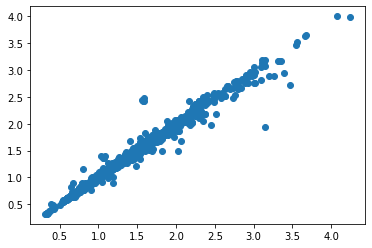

In [57]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

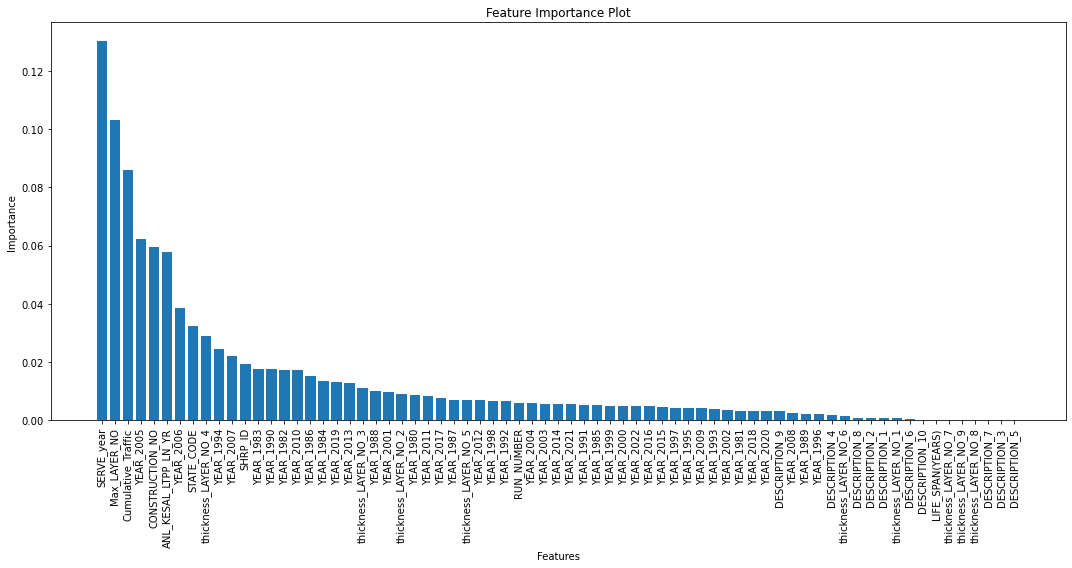

In [58]:
import matplotlib.pyplot as plt
# Get the feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store the feature importances along with their corresponding feature names
importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame in descending order of feature importances
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.svm import SVR
# Instantiate the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2083727044688969


**Apply Neural Network**

Epoch 1/100
130/130 [==============================] - 2s 10ms/step - loss: 0.4279 - val_loss: 0.3923
Epoch 2/100
130/130 [==============================] - 1s 8ms/step - loss: 0.3627 - val_loss: 0.4054
Epoch 3/100
130/130 [==============================] - 1s 10ms/step - loss: 0.3438 - val_loss: 0.3419
Epoch 4/100
130/130 [==============================] - 1s 8ms/step - loss: 0.3222 - val_loss: 0.3069
Epoch 5/100
130/130 [==============================] - 1s 7ms/step - loss: 0.3104 - val_loss: 0.3381
Epoch 6/100
130/130 [==============================] - 1s 8ms/step - loss: 0.3027 - val_loss: 0.2872
Epoch 7/100
130/130 [==============================] - 1s 8ms/step - loss: 0.2923 - val_loss: 0.3169
Epoch 8/100
130/130 [==============================] - 1s 8ms/step - loss: 0.2845 - val_loss: 0.2694
Epoch 9/100
130/130 [==============================] - 1s 8ms/step - loss: 0.2823 - val_loss: 0.2909
Epoch 10/100
130/130 [==============================] - 0s 4ms/step - loss: 0.2680 - val_

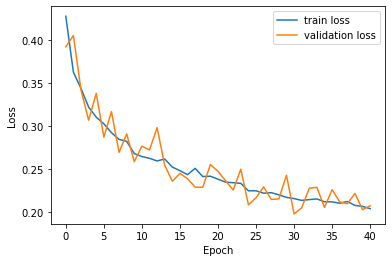

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
 
X_train, X_val, y_train, y_val = train_test_split(merged_df_X ,merged_df_y , test_size=0.2, random_state=42)
# Normalize the input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define a more complex neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.4))  # Adding dropout with a higher rate
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mae')

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model on the scaled training set
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = model.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

33/33 [==============================] - 0s 3ms/step
Mean Squared Error: 0.12359286657286293
R-squared: 0.6011819956857698
